In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("calloff_hub.csv")
#  data pre-observation on top 20 frquency items, ignore hub difference
top_list =  np.array(df['ITEM_NUM'].value_counts()[:30].index).tolist()

top_20 = df[df["ITEM_NUM"].isin(top_list)].drop(columns=["CUST_PLANT"]).reset_index().drop(columns=["index"])
top_20["TRX_DATE"] = top_20["TRX_DATE"].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

pivot = top_20.pivot_table("QUANTITY", index = "TRX_DATE", columns = "ITEM_NUM")

minmax_table = top_20.groupby('ITEM_NUM')['TRX_DATE'].agg(['min','max'])
start_date = minmax_table["min"].min()
end_date = minmax_table["max"].max()

# get time series list, from first to least data  
date_list = pd.date_range(start_date, end_date, freq = "D")

df = pd.DataFrame( columns = top_list, index = date_list )
df.update(pivot)
#ts_format.fillna(0)

df.insert(loc=0, column='Date', value = df.index)

#df['week_firstday'] = df['Date'] - pd.to_timedelta(arg=df['Date'].dt.weekday, unit='D')
df.insert(loc=1, column='week_firstday', value = df['Date'] - pd.to_timedelta(arg=df['Date'].dt.weekday, unit='D'))
#df.insert(loc=1, column='week', value = dt.df["Date"].isocalendar()[1])
#df["week"] = datetime.df["Date"].isocalendar()[1]

df.drop('Date', axis=1, inplace=True)
df_week = df.groupby(['week_firstday'])[df.columns.values.tolist()[1:]].agg('sum')

In [3]:
# dataframe of base unit of every item, base unit can be min / mid / quantile @ % 第幾百分位數
df_base = df_week/df_week[df_week !=0].quantile(0.20,axis=0)
df_base_1 = df_week/df_week[df_week !=0].min(axis=0)

C:\Users\CEJ\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


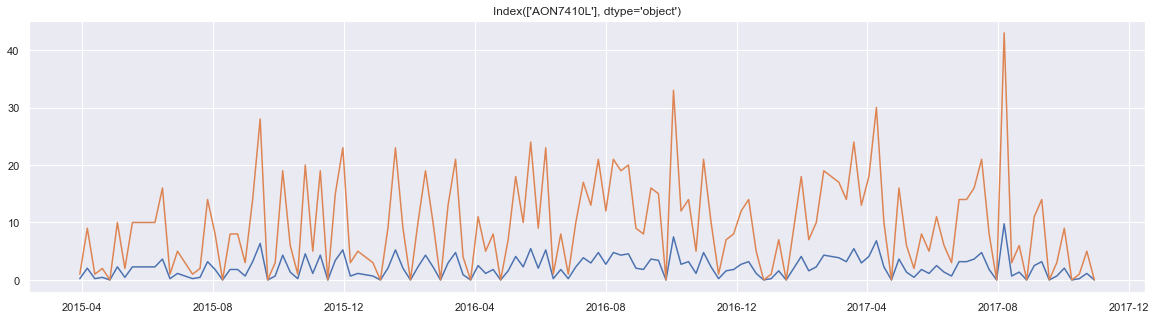

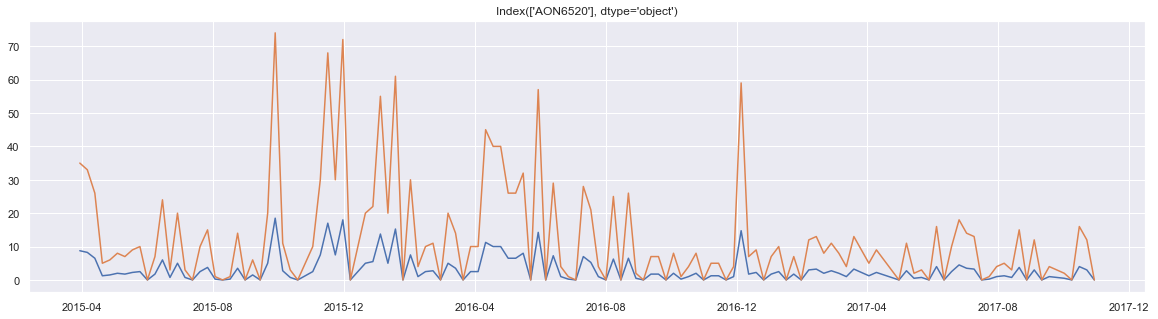

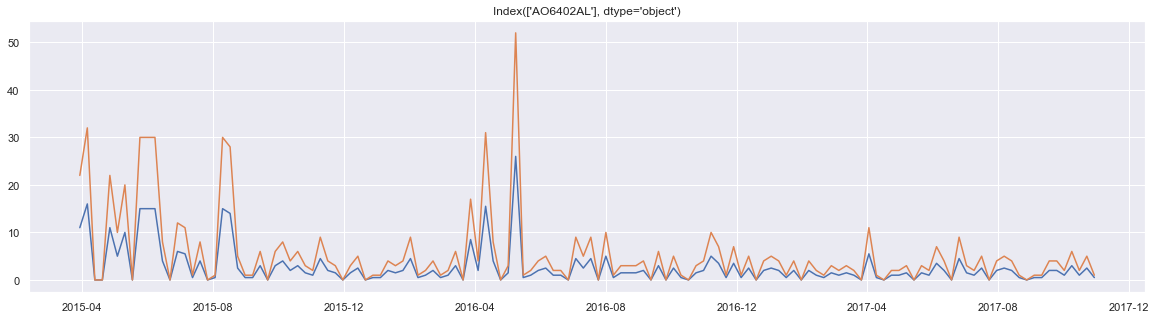

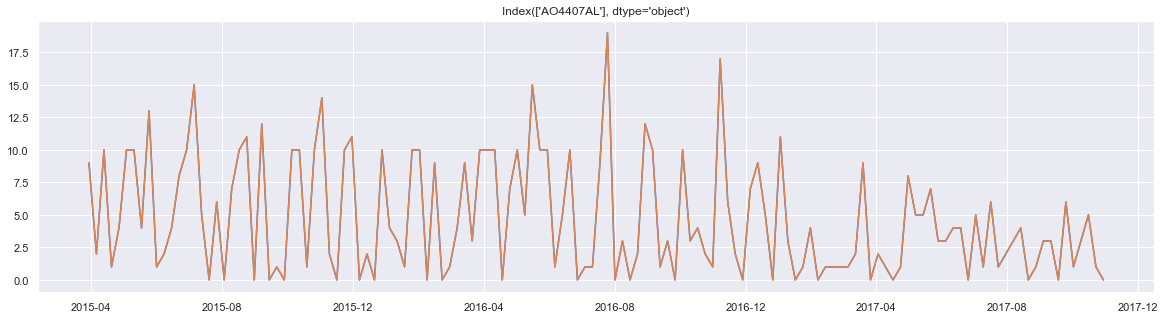

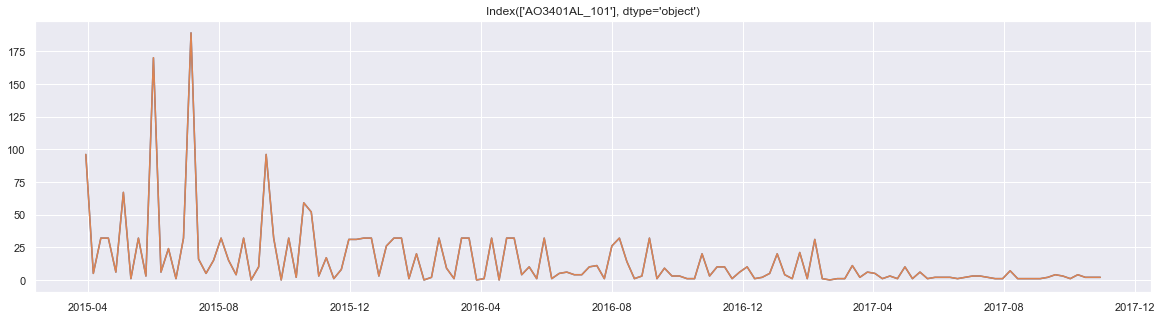

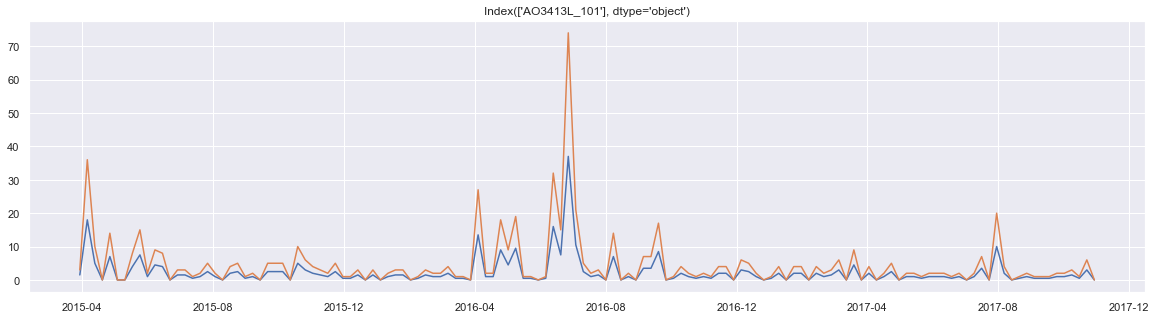

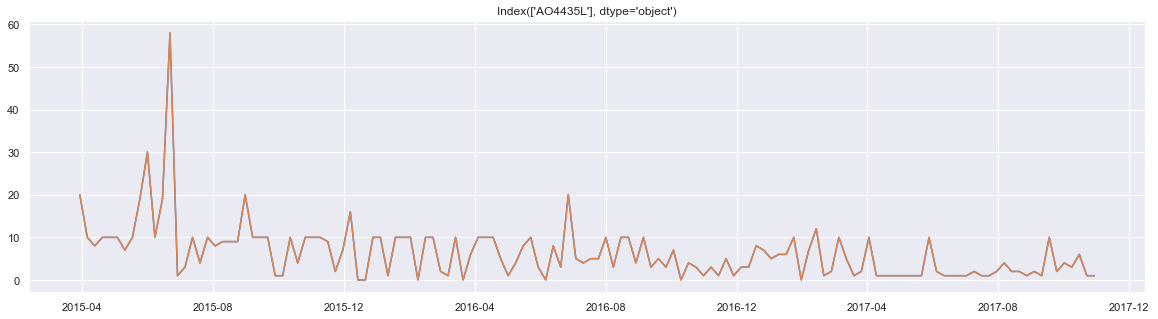

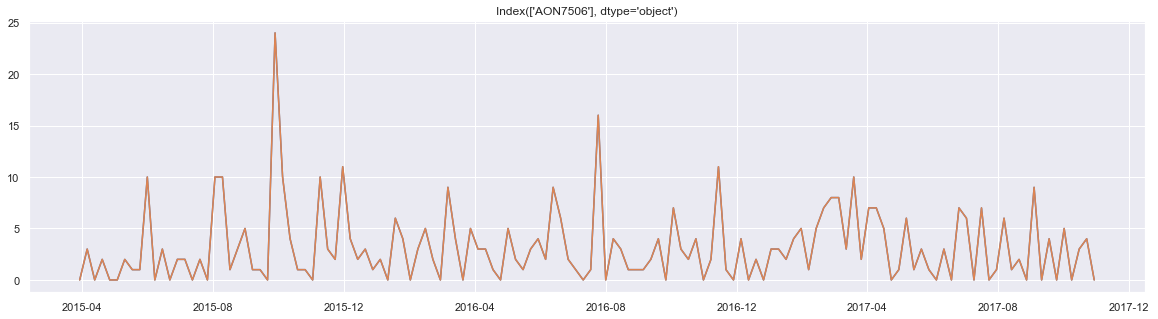

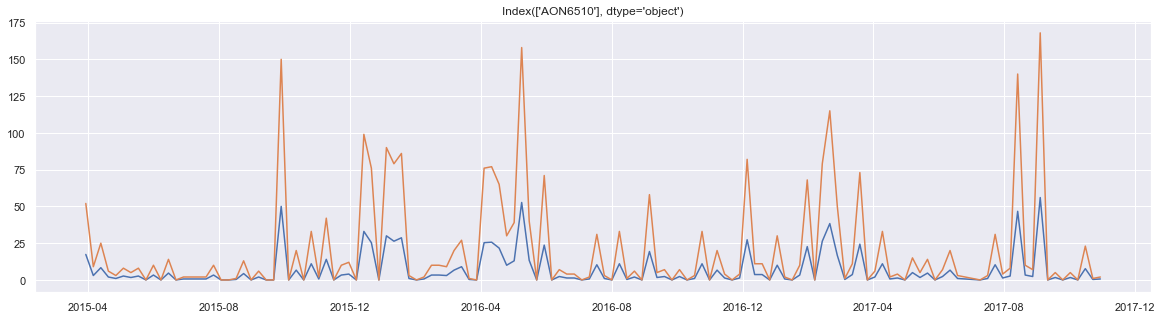

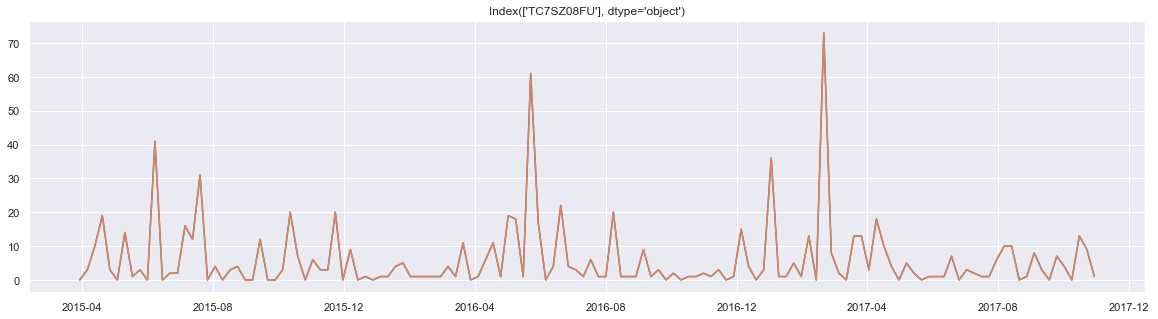

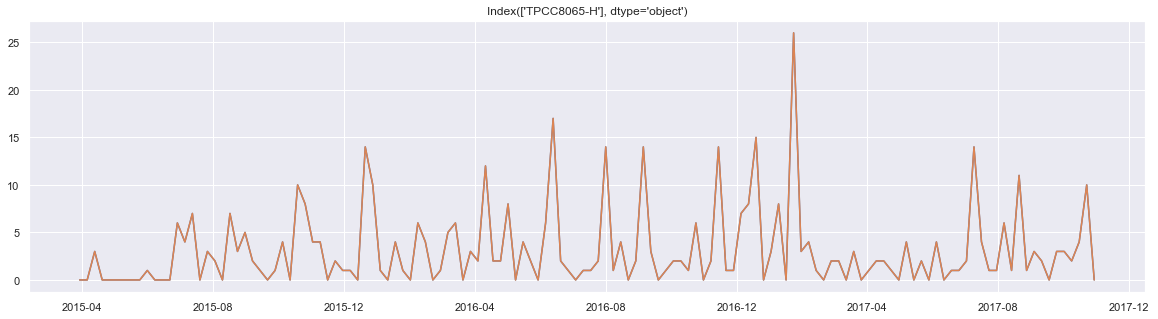

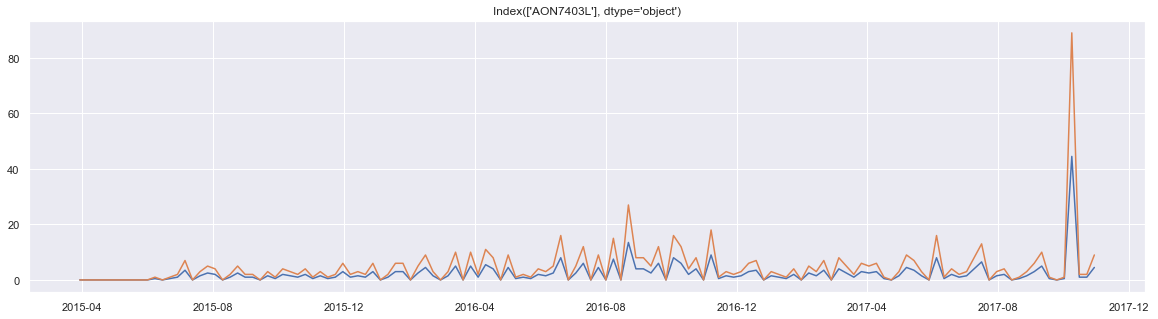

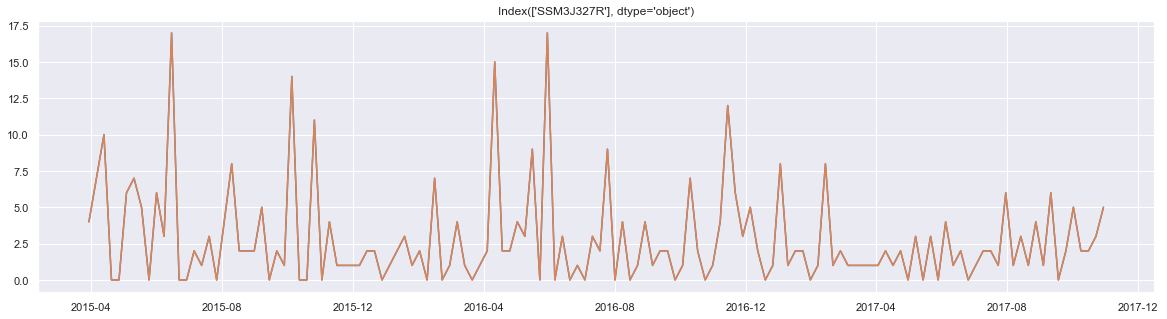

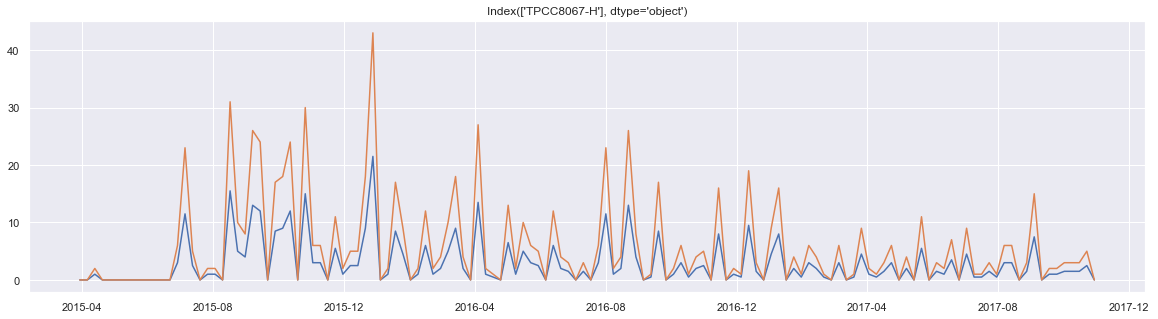

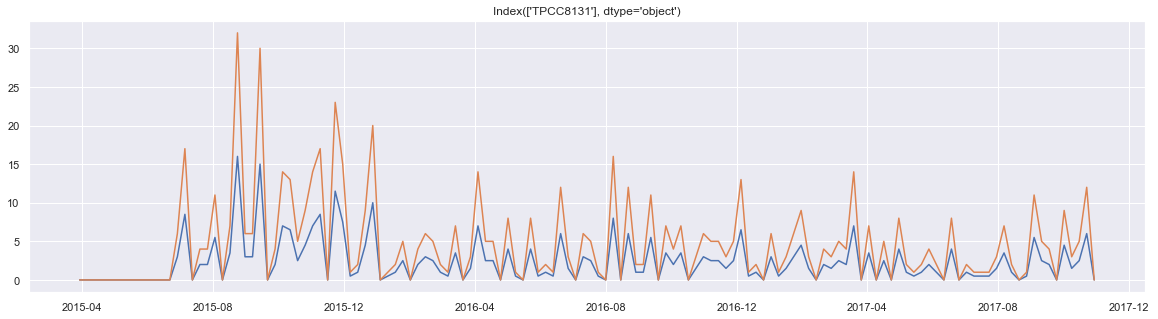

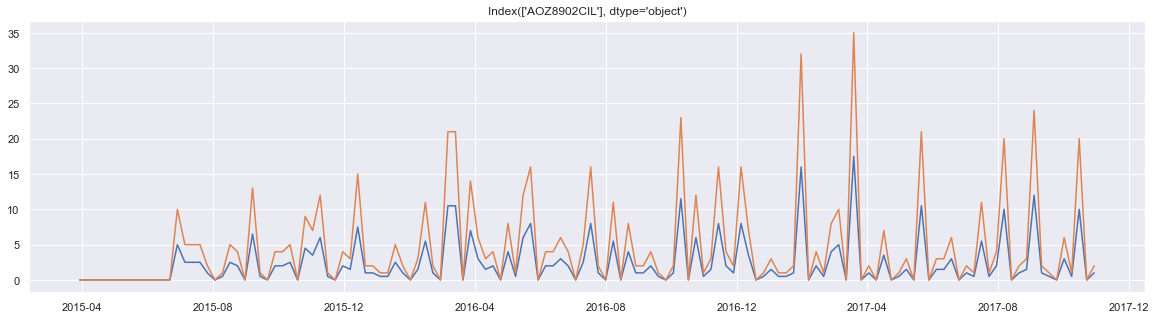

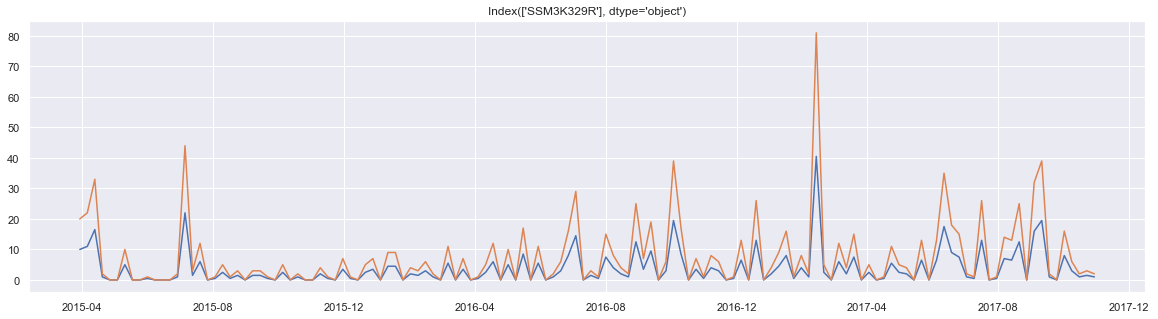

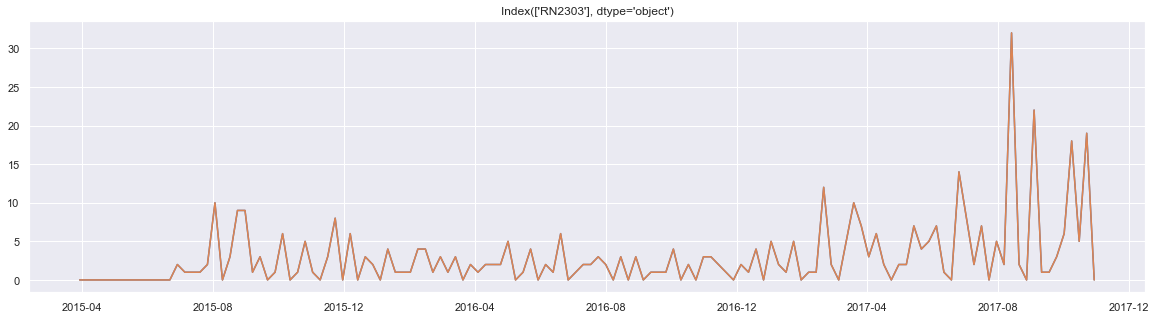

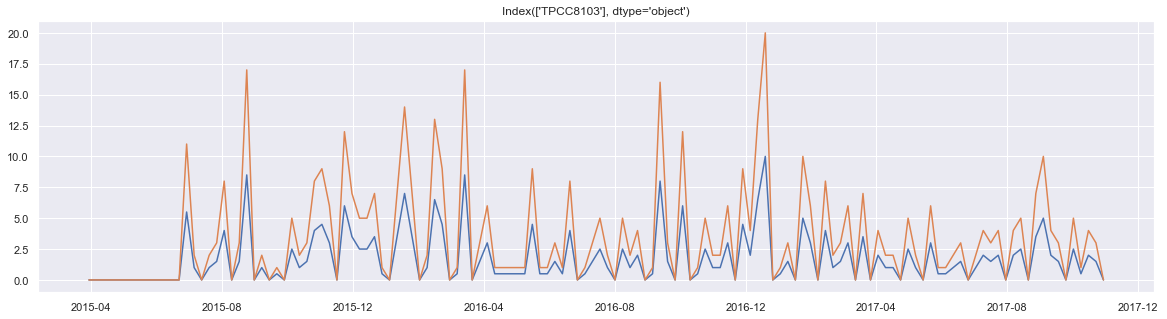

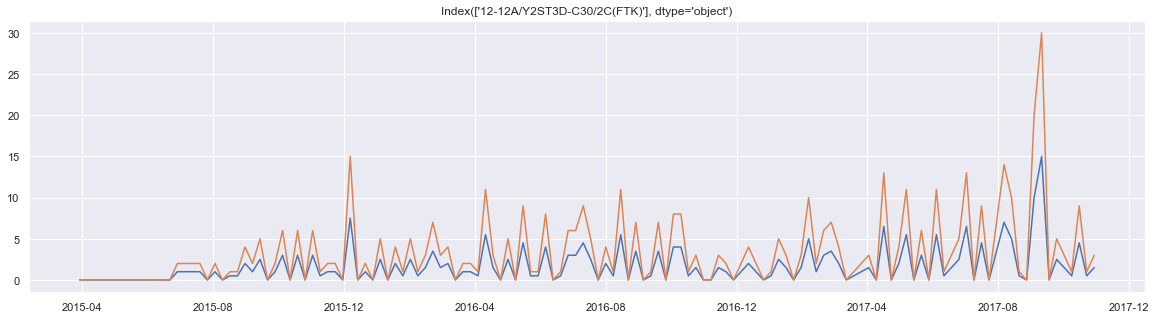

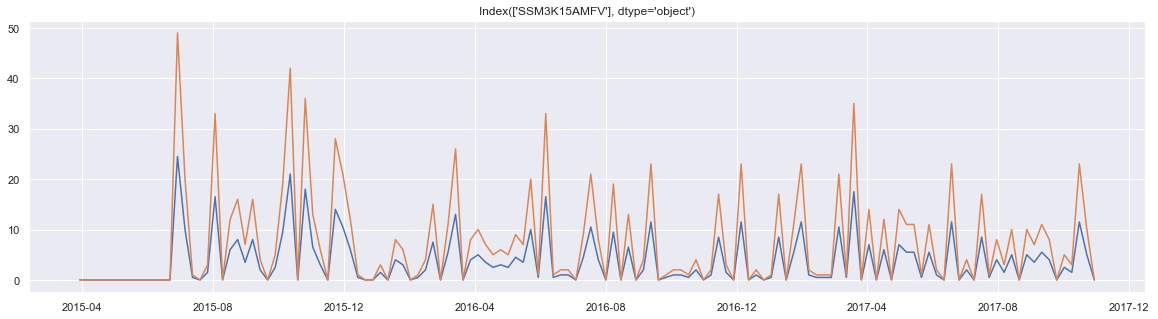

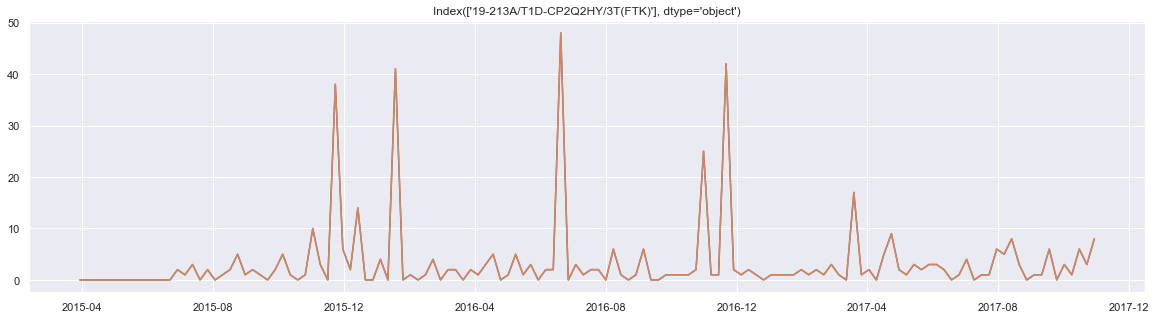

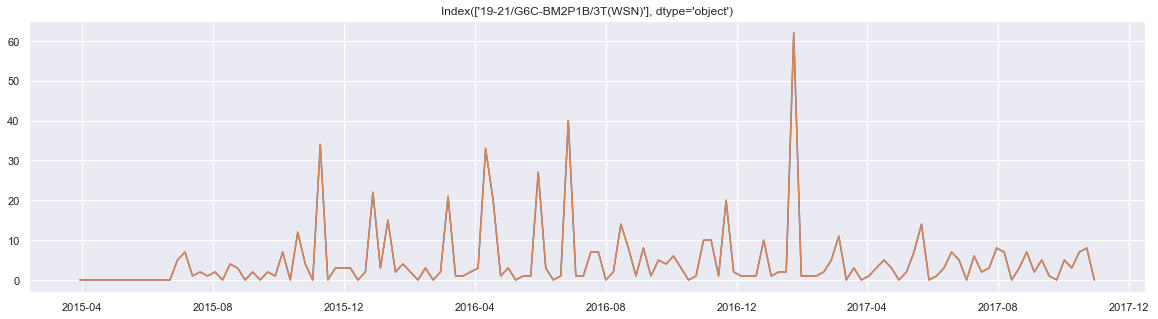

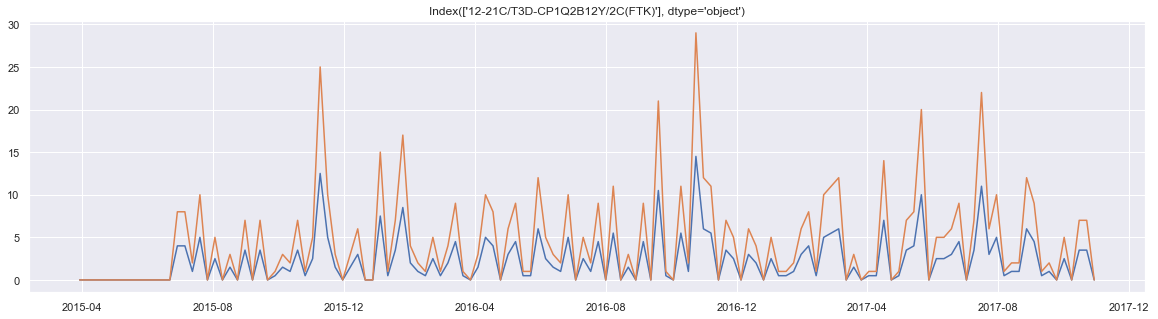

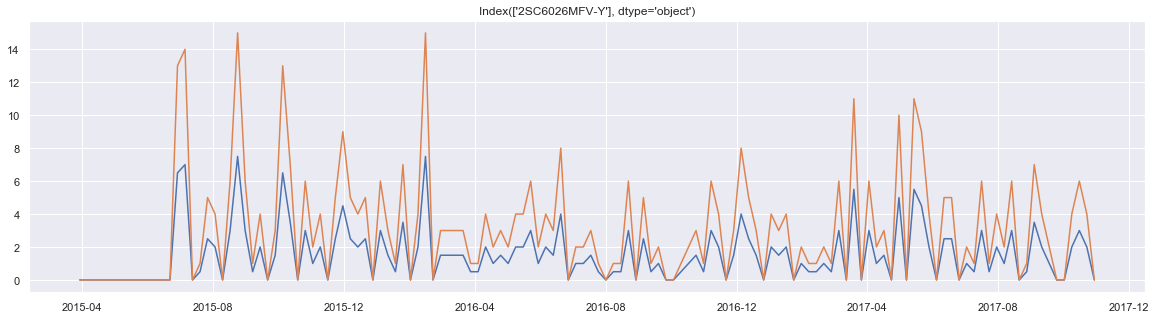

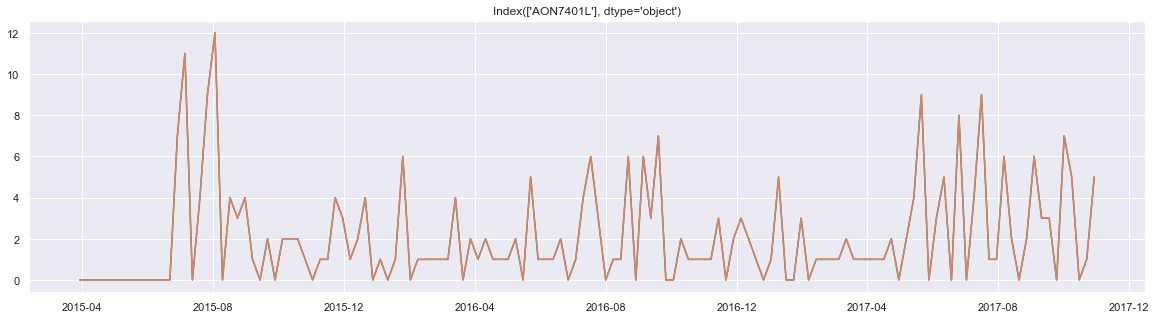

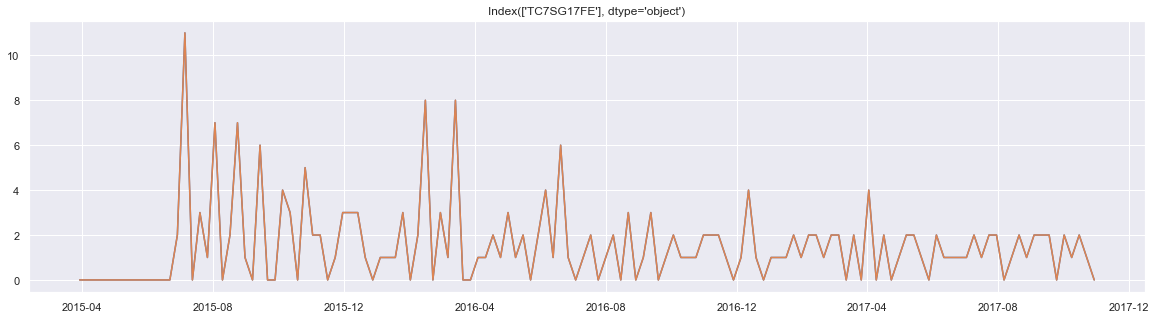

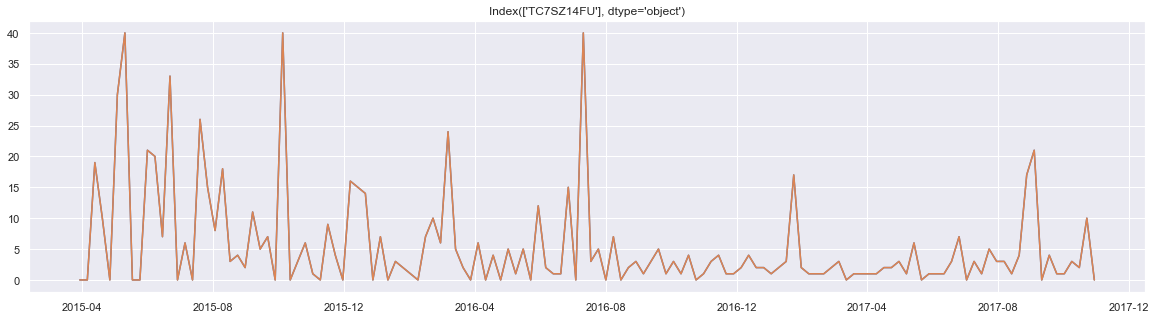

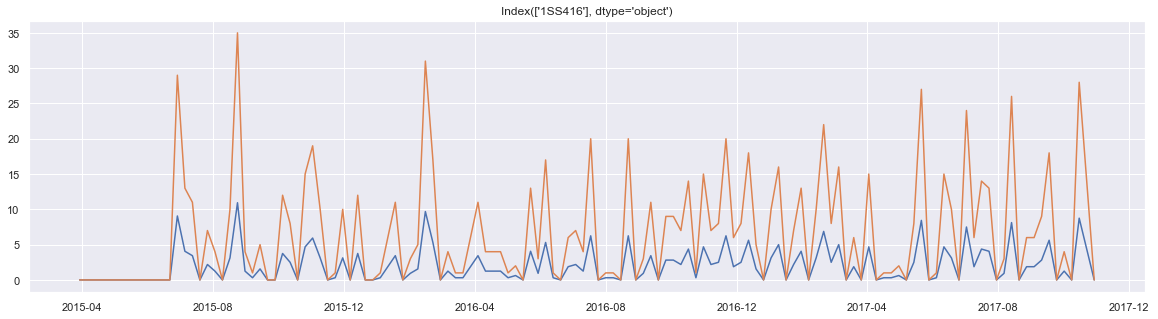

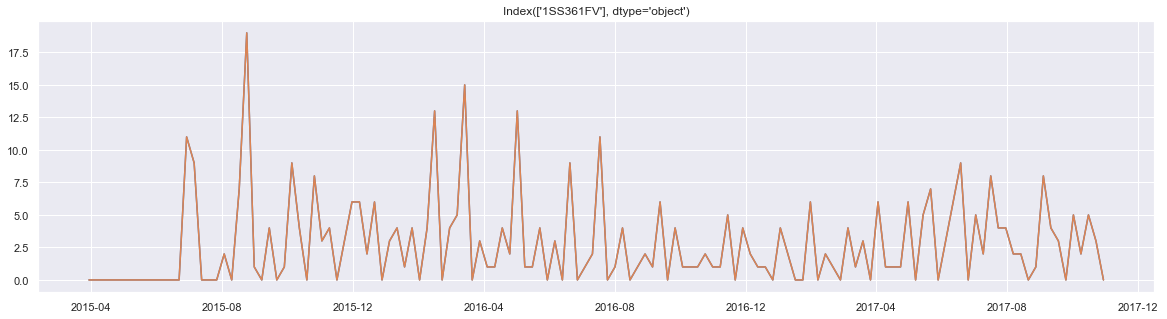

In [4]:
for x in range(30):    
    plt.figure(figsize=(20,5))
    plt.plot(df_base.iloc[:,x:x+1], label = "0.25")
    plt.plot(df_base_1.iloc[:,x:x+1], label = "min")
    plt.title(df_base_1.iloc[:,x:x+1].columns)